In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plotCorrelation(data):
    corr_data = data.copy()
    names = list(corr_data.columns)
    correlations = corr_data.corr().abs()
    fig = plt.figure(figsize=(50, 50))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    # fig.colorbar(cax)
    ticks = np.arange(0,len(names),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    
def reduce(data, threshold=0.9):
    correlations = data.corr().abs()
    upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop)

def inpute(data, feature):
    from sklearn.linear_model import ElasticNet
    from sklearn.neural_network import MLPRegressor
    
    X = data.copy().drop(columns=[feature])
    X = X.select_dtypes(exclude=['object'])
    X = X.fillna(X.median())
    y = data[feature]
    X_train = X[~y.isna()]
    X_test = X[y.isna()]
    y_train = y[~y.isna()]
    y_test = y[y.isna()]
    
    model = MLPRegressor()
    model.fit(X_train, y_train)
    print("Feature: %s | Loss = " % feature, model.loss_)
    filled_gaps = model.predict(X_test)
    for i, index in enumerate(data[feature][data[feature].isna()].index):
        data.at[index, feature] = filled_gaps[i]
    return data

In [3]:
data = pd.read_csv("data/week-one/X_train.csv", parse_dates=True)

In [4]:
data['year'] = pd.DatetimeIndex(pd.to_datetime(data.timestamp)).year
data = data.drop(columns=["timestamp"])
data.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,year
0,11180,51,30.0,2.0,17.0,1.0,1986.0,2.0,8.0,3.0,...,1,0,7,33,1,9,48,11,9300000,2013
1,23071,48,48.0,9.0,17.0,4.0,2016.0,1.0,10.0,1.0,...,5,0,25,44,0,12,114,13,5277083,2014
2,18942,77,46.0,2.0,16.0,1.0,1978.0,3.0,10.0,NaN,...,0,0,5,22,0,1,33,8,12500000,2014
3,24805,109,54.0,9.0,14.0,1.0,2001.0,3.0,11.0,2.0,...,1,0,1,10,1,0,16,0,13050000,2014
4,14778,33,19.0,2.0,3.0,2.0,1961.0,1.0,6.0,3.0,...,3,0,14,29,1,4,90,6,5500000,2014


In [5]:
# for column in data.columns:
#     print(column)

In [6]:
# data.corr()

In [7]:
# plotCorrelation(data)

In [8]:
# data.corr()['price_doc'].sort_values(ascending=False).iloc[:20].plot.bar()


In [9]:
data = reduce(data.drop(columns=['price_doc', 'id']), 0.9)
# data

In [10]:
data.shape

(21329, 144)

In [11]:
# plotCorrelation(data)

In [12]:
# for i in data.dtypes:
#     print(i)

In [13]:
for column in data.columns[data.isna().any() == True]:
    data = inpute(data, column)

Feature: life_sq | Loss =  1093343.2498474482
Feature: floor | Loss =  5731348.666020751
Feature: max_floor | Loss =  49785026.604657695
Feature: material | Loss =  801414.7519157121
Feature: build_year | Loss =  12493608.499357829
Feature: num_room | Loss =  210584292.89246976
Feature: kitch_sq | Loss =  1282909.7519695591
Feature: state | Loss =  908109.1043573491
Feature: preschool_quota | Loss =  20212483.366627384
Feature: hospital_beds_raion | Loss =  1585434.0481723533
Feature: raion_build_count_with_material_info | Loss =  1594959.1549684373
Feature: build_count_block | Loss =  222974715.97676367
Feature: build_count_wood | Loss =  771425.2848438703
Feature: build_count_frame | Loss =  746394.0271070593
Feature: build_count_brick | Loss =  2312210.1383977854
Feature: build_count_monolith | Loss =  579928.4527746128
Feature: build_count_panel | Loss =  73058001.76381297
Feature: build_count_foam | Loss =  16366661.527631314
Feature: build_count_mix | Loss =  2536519.8594479254
F

In [14]:
data.dtypes

full_sq                          int64
life_sq                        float64
floor                          float64
max_floor                      float64
material                       float64
                                ...   
trc_sqm_5000                     int64
cafe_sum_5000_min_price_avg    float64
mosque_count_5000                int64
market_count_5000                int64
year                             int64
Length: 144, dtype: object

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
enc = OneHotEncoder()
enc.fit(data.select_dtypes(include=['object']))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [17]:
enc.categories_

[array(['Investment', 'OwnerOccupier'], dtype=object),
 array(['Ajeroport', 'Akademicheskoe', 'Alekseevskoe', "Altuf'evskoe",
        'Arbat', 'Babushkinskoe', 'Basmannoe', 'Begovoe',
        'Beskudnikovskoe', 'Bibirevo', 'Birjulevo Vostochnoe',
        'Birjulevo Zapadnoe', 'Bogorodskoe', 'Brateevo', 'Butyrskoe',
        'Caricyno', 'Cheremushki', "Chertanovo Central'noe",
        'Chertanovo Juzhnoe', 'Chertanovo Severnoe', 'Danilovskoe',
        'Dmitrovskoe', 'Donskoe', 'Dorogomilovo', 'Filevskij Park',
        'Fili Davydkovo', 'Gagarinskoe', "Gol'janovo", 'Golovinskoe',
        'Hamovniki', 'Horoshevo-Mnevniki', 'Horoshevskoe', 'Hovrino',
        'Ivanovskoe', 'Izmajlovo', 'Jakimanka', 'Jaroslavskoe', 'Jasenevo',
        'Juzhnoe Butovo', 'Juzhnoe Medvedkovo', 'Juzhnoe Tushino',
        'Juzhnoportovoe', 'Kapotnja', "Kon'kovo", 'Koptevo',
        'Kosino-Uhtomskoe', 'Kotlovka', "Krasnosel'skoe", 'Krjukovo',
        'Krylatskoe', 'Kuncevo', 'Kurkino', "Kuz'minki", 'Lefortovo',
  

In [18]:
for column in data.select_dtypes(include=['object']).drop(columns=['ecology', 'sub_area', 'product_type']).columns:
    data[column] = data[column].map({'yes':1, 'no':0})

In [19]:
data['ecology'] = data['ecology'].map({'excellent':4,'good':3,'satisfactory':2,'poor':1,'no data':0}) 

In [20]:
data.select_dtypes(include=['object'])

,product_type,sub_area
0,Investment,Chertanovo Severnoe
1,OwnerOccupier,Izmajlovo
2,Investment,Jasenevo
3,Investment,Juzhnoe Butovo
4,Investment,Sviblovo
...,...,...
21324,Investment,Sokol
21325,OwnerOccupier,Poselenie Vnukovskoe
21326,Investment,Otradnoe
21327,OwnerOccupier,Poselenie Sosenskoe


In [21]:
data.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_sum_3000_min_price_avg,mosque_count_3000,market_count_3000,green_part_5000,prom_part_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,year
count,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,2.132900e+04,...,21329.000000,21329.000000,21329.000000,21329.000000,21329.000000,2.132900e+04,21329.000000,21329.000000,21329.000000,21329.000000
mean,54.211590,294.677373,-2.935693,-5200.302470,-290.161022,-492.383426,1830.458865,-815.906172,244.074893,1.769907e+07,...,767.779145,0.199587,2.323972,22.774102,-316.973895,1.168021e+06,780.866081,0.439683,5.985278,2013.451357
std,43.094825,773.216724,245.324067,15008.404935,952.320592,4734.864447,3260.244295,2369.155026,1038.508078,2.063673e+07,...,239.681502,0.448980,2.273553,11.234853,4289.787820,9.969508e+05,257.830344,0.607400,4.886269,0.961120
min,0.000000,-5845.497605,-13406.364619,-227153.738458,-12973.365971,-52350.669677,-5317.939915,-29963.615802,-16143.332445,2.081628e+06,...,-8.617991,0.000000,0.000000,3.560000,-66216.871589,0.000000e+00,300.000000,0.000000,0.000000,2011.000000
25%,38.000000,21.000000,3.000000,-2057.286964,-13.489602,-1002.306682,1.000000,-398.507296,1.000000,7.307411e+06,...,648.080000,0.000000,0.000000,14.780000,6.040000,2.620000e+05,671.050000,0.000000,1.000000,2013.000000
50%,49.000000,33.000000,6.000000,9.000000,1.000000,1960.000000,2.000000,5.000000,2.000000,1.050803e+07,...,710.990000,0.000000,2.000000,19.740000,8.860000,1.073615e+06,722.410000,0.000000,5.000000,2014.000000
75%,63.000000,61.000000,11.000000,17.000000,2.000000,1986.000000,3088.529398,8.000000,358.510787,1.803644e+07,...,822.220000,0.000000,4.000000,31.380000,13.970000,1.681066e+06,821.160000,1.000000,10.000000,2014.000000
max,5326.000000,9668.918354,5974.799599,16985.840619,14303.928428,18481.875137,44901.362502,20906.302497,17185.609984,2.060718e+08,...,3223.902205,2.000000,10.000000,75.460000,28.560000,4.558181e+06,3934.732207,2.000000,20.000000,2015.000000


In [22]:
from scipy import stats

In [23]:
data.fillna(data.median(), inplace=True)
z = pd.DataFrame(dict([(column,abs(stats.zscore(data[column]))) for column in data.select_dtypes(exclude=['object']).columns]))

In [24]:
b = data.loc[~((z > 5).sum(axis=1) > 1)]
b.shape

(19459, 144)

In [25]:
data.loc[b.index]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,...,cafe_sum_3000_min_price_avg,mosque_count_3000,market_count_3000,green_part_5000,prom_part_5000,trc_sqm_5000,cafe_sum_5000_min_price_avg,mosque_count_5000,market_count_5000,year
0,51,30.000000,2.0,17.000000,1.000000,1986.000000,2.000000,8.000000,3.000000,Investment,...,675.32,1,8,23.89,19.10,1525045,668.75,1,11,2013
1,48,48.000000,9.0,17.000000,4.000000,2016.000000,1.000000,10.000000,1.000000,OwnerOccupier,...,675.86,0,2,21.83,16.82,1043785,691.70,0,13,2014
2,77,46.000000,2.0,16.000000,1.000000,1978.000000,3.000000,10.000000,-664.758968,Investment,...,515.00,0,4,45.72,6.45,1563795,627.38,0,8,2014
3,109,54.000000,9.0,14.000000,1.000000,2001.000000,3.000000,11.000000,2.000000,Investment,...,776.92,1,0,26.59,5.31,308554,788.89,1,0,2014
4,33,19.000000,2.0,3.000000,2.000000,1961.000000,1.000000,6.000000,3.000000,Investment,...,670.00,1,2,24.65,14.40,1308036,683.33,1,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21324,45,27.000000,5.0,5754.573038,1600.565480,2123.270434,9009.997338,2849.029530,-3935.070233,Investment,...,758.74,0,6,14.42,16.22,1937956,798.03,0,13,2013
21325,78,1076.047751,17.0,17.000000,1.000000,2015.000000,3.000000,10.000000,-881.596620,OwnerOccupier,...,700.00,0,0,34.95,6.16,201300,747.37,0,0,2014
21326,48,28.000000,9.0,9.000000,1.000000,1975.000000,2.000000,6.000000,3.000000,Investment,...,650.77,1,3,15.70,16.59,2515392,670.67,1,5,2014
21327,44,1962.208609,6.0,-72195.821240,-3028.950736,-15720.986652,8107.390252,-12193.807948,3182.362937,OwnerOccupier,...,1000.00,0,0,37.13,7.12,600980,783.78,1,4,2012


In [91]:
import os
macro = pd.read_csv("data/week-one/macro.csv", parse_dates=['timestamp'])
data = pd.read_csv("data/week-one/X_train.csv", parse_dates=['timestamp'])
print(macro.shape)

macro_diff = macro.select_dtypes(exclude=['object']).diff().add_prefix("diff_").drop(columns='diff_timestamp')
print(macro_diff.shape)
macro = pd.concat([macro,macro_diff],axis=1)
macro.shape

(2484, 100)
(2484, 96)


(2484, 196)

In [93]:
X_all = pd.merge_ordered(data, macro, on='timestamp', how='left')

In [94]:
X_all.shape

(21329, 487)

In [95]:
macro_data = X_all.copy()[X_all.columns[291:]]
macro_data['timestamp'] = X_all['timestamp']

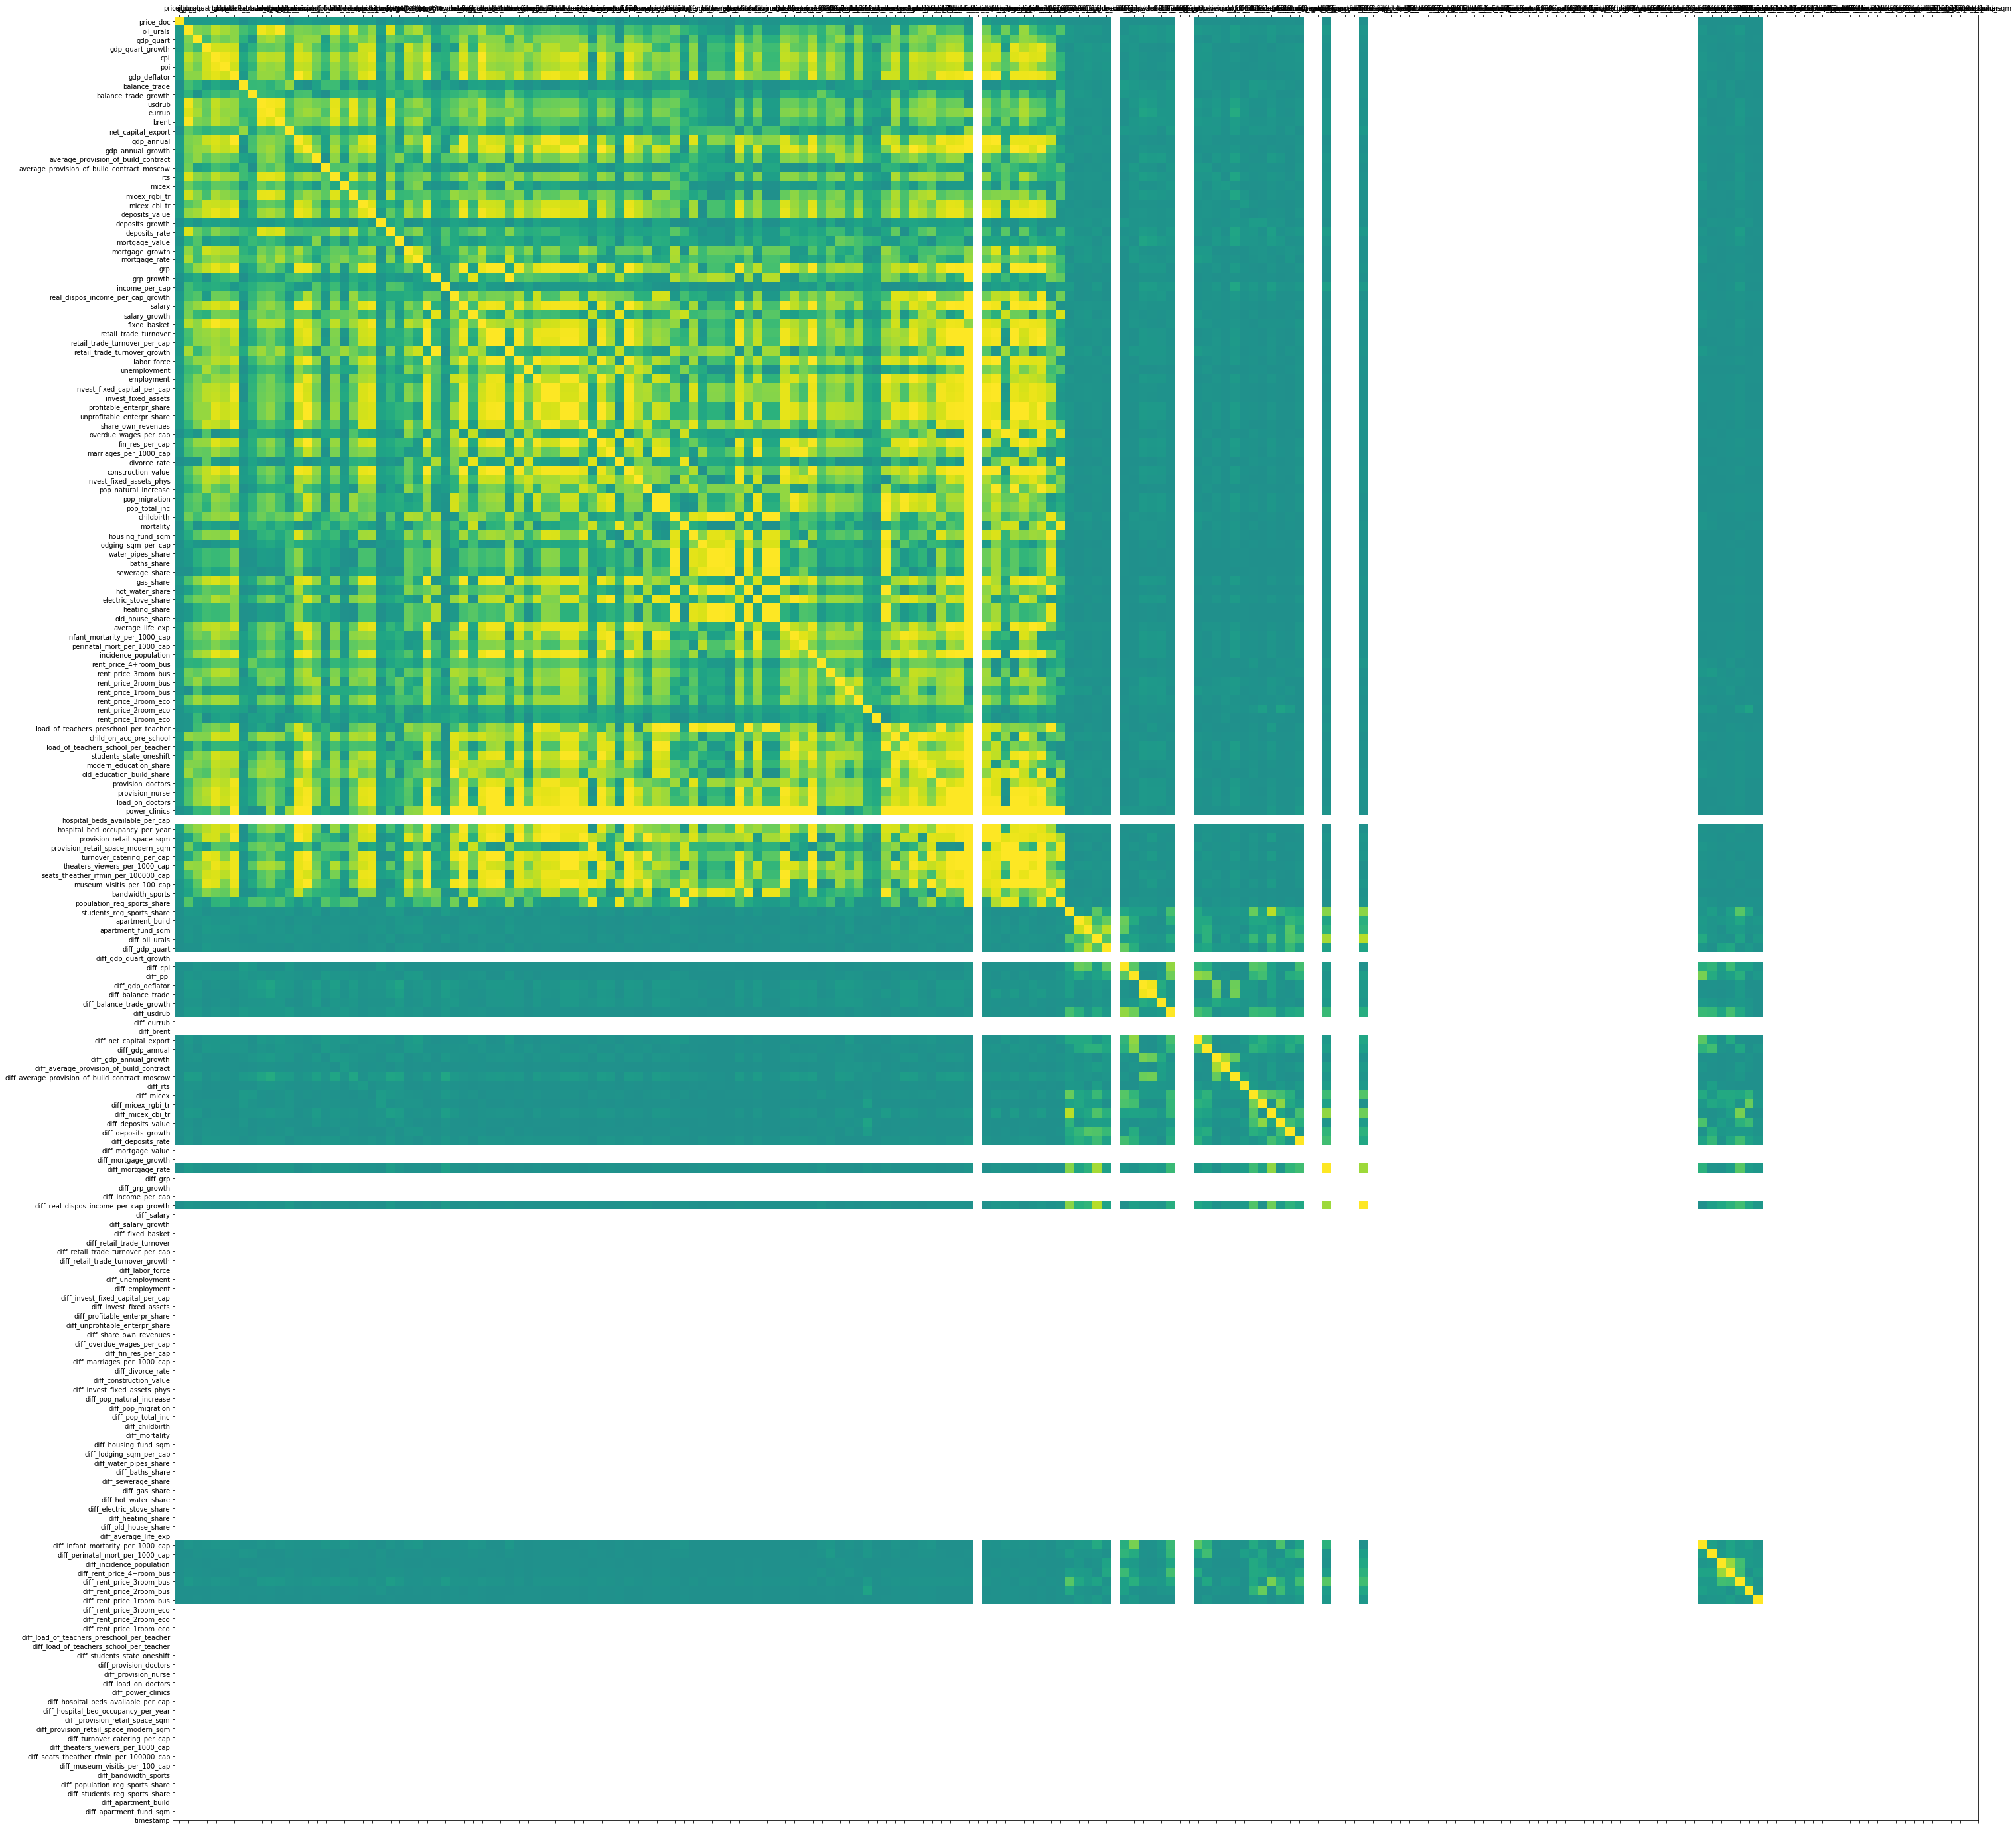

In [96]:
plotCorrelation(macro_data)

In [97]:
price_corr = macro_data.corr()['price_doc']

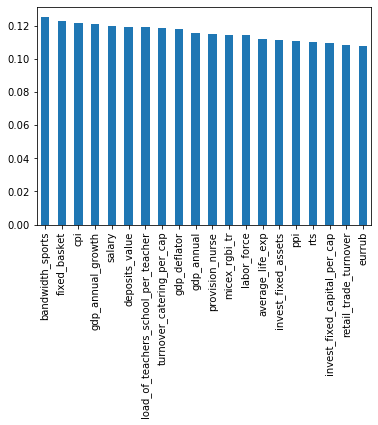

In [98]:
price_corr.iloc[1:].abs().sort_values(ascending=False).iloc[:20].plot.bar()

In [72]:
macro_diff = macro.select_dtypes(exclude=['object']).diff().add_prefix("diff_")

In [100]:
price_corr.iloc[1:].abs().sort_values(ascending=False).iloc[:10].index

Index(['bandwidth_sports', 'fixed_basket', 'cpi', 'gdp_annual_growth',
       'salary', 'deposits_value', 'load_of_teachers_school_per_teacher',
       'turnover_catering_per_cap', 'gdp_deflator', 'gdp_annual'],
      dtype='object')